In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar 
import datetime

In [2]:
myuber = pd.read_csv('My Uber Drives - 2016.csv')

In [3]:
myuber.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01/01/2016 21:11,01/01/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01/02/2016 01:25,01/02/2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01/02/2016 20:25,01/02/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01/05/2016 17:31,01/05/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01/06/2016 14:42,01/06/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
print(myuber.isnull().sum())

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64


In [5]:
my_uber = myuber.dropna()

In [6]:
myuber['START_DATE'] = pd.to_datetime(myuber['START_DATE'], format='%m/%d/%Y %H:%M')
myuber['END_DATE'] = pd.to_datetime(myuber['END_DATE'], format='%m/%d/%Y %H:%M')

In [7]:
from pandas.core.arrays.integer import safe_cast
myuber['HOUR'] = [x.hour for x in myuber['START_DATE']]
myuber['DAY'] = [ x.day for x in myuber['START_DATE']]
myuber['MONTH'] = [x.month for x in myuber['START_DATE']]
myuber['WEEKDAY'] = [calendar.day_name[x.dayofweek] for x in myuber['START_DATE']]
myuber['DAY_OF_WEEK'] = [x.dayofweek for x in myuber['START_DATE']]

In [8]:
myuber

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1,2,1,Saturday,5
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,12,Saturday,5
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,12,Saturday,5
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,12,Saturday,5
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,12,Saturday,5


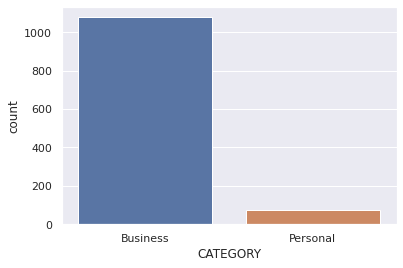

In [9]:
#Lets see what the category column looks like using the countplot() of seaborn. 
sns.set_theme(style="darkgrid")
sns.countplot(data= myuber, x= 'CATEGORY')

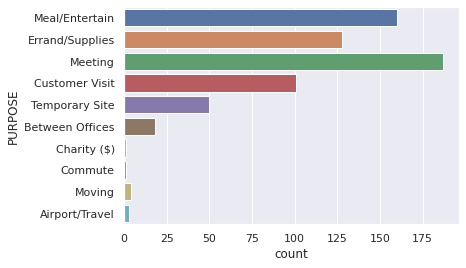

In [10]:
sns.countplot(data= myuber, y='PURPOSE')

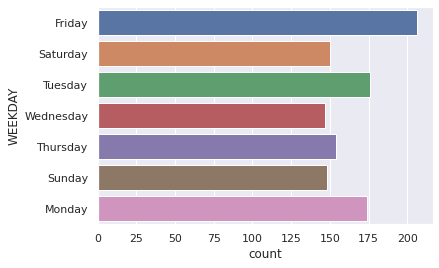

In [11]:
sns.countplot(data=myuber, y="WEEKDAY")

(array([1.104e+03, 2.600e+01, 8.000e+00, 4.000e+00, 4.000e+00, 4.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.5 ,  31.48,  62.46,  93.44, 124.42, 155.4 , 186.38, 217.36,
        248.34, 279.32, 310.3 ]),
 <a list of 10 Patch objects>)

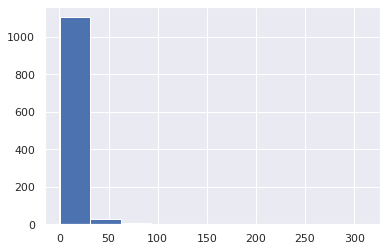

In [12]:
plt.hist(data=myuber, x='MILES')

(array([ 26.,   3.,   8.,  99., 137., 171., 275., 189., 139., 108.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

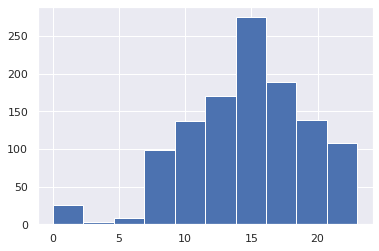

In [13]:
plt.hist(data=myuber, x='HOUR') #Te da las más representativas 

Text(0, 0.5, '# DE VIAJES')

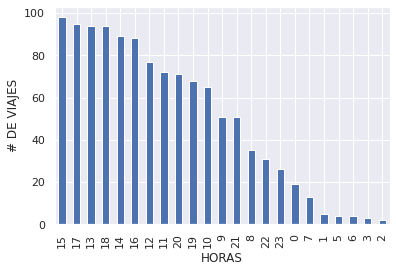

In [14]:
hours = myuber['HOUR'].value_counts() #Te da todas 
hours.plot(kind='bar')
plt.xlabel('HORAS')
plt.ylabel('# DE VIAJES')


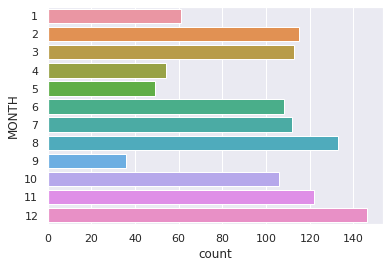

In [15]:
#months = myuber['MONTH'].value_counts()
#months.plot(kind='bar', color='darkblue')
sns.countplot(data=myuber, y='MONTH')

Text(0.5, 1.0, 'Viajes realizados en Diciembre')

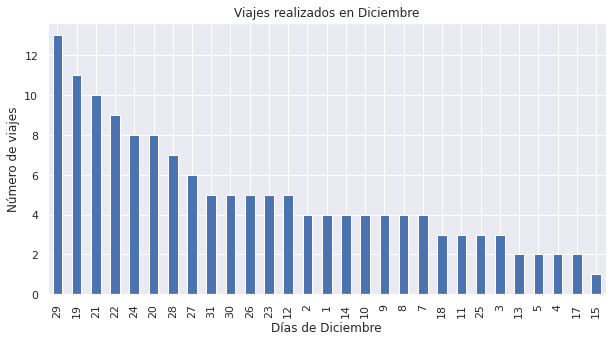

In [16]:
months = myuber['DAY'][myuber['MONTH']==12].value_counts()
months.plot(kind='bar', figsize=(10,5))
plt.xlabel('Días de Diciembre')
plt.ylabel('Número de viajes')
plt.title('Viajes realizados en Diciembre')

Text(0.5, 1.0, 'Pick up point ')

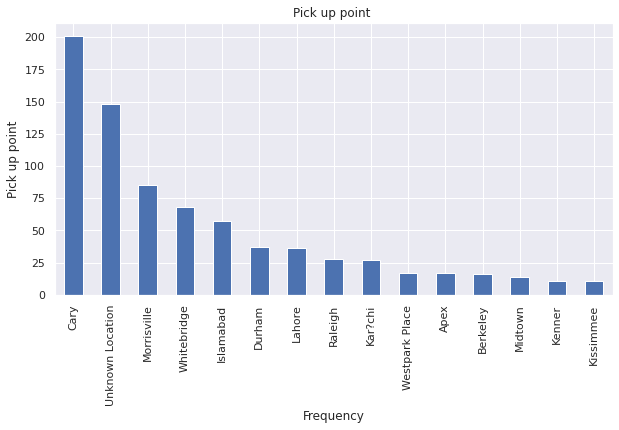

In [17]:
months = myuber['START'].value_counts().nlargest(15)
months.plot(kind='bar', figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Pick up point')
plt.title('Pick up point ')

Text(0.5, 1.0, 'End point ')

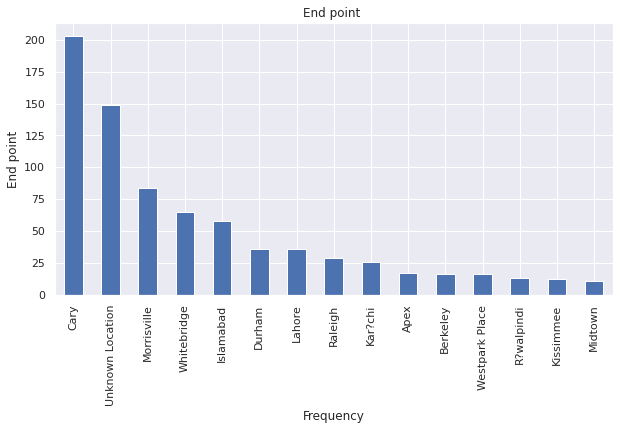

In [18]:
months = myuber['STOP'].value_counts().nlargest(15)
months.plot(kind='bar', figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('End point')
plt.title('End point ')

In [19]:
data = pd.read_csv('rideshare_kaggle.csv')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [21]:
extra_cols = ['apparentTemperature', 'precipIntensity', 'humidity', 'windSpeed', 'windGust', 'apparentTemperatureHigh',
              'dewPoint','precipIntensityMax',  'apparentTemperatureMax', 'cloudCover', 'moonPhase', 'windGustTime', 'visibility', 
              'temperatureHighTime', 'temperatureLowTime', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'temperatureMinTime',
              'temperatureMaxTime', 'apparentTemperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMin',
              'uvIndexTime', 'sunsetTime', 'sunriseTime', 'ozone', 'visibility.1', 'uvIndex', 'windBearing']

data = data.drop(extra_cols, axis=1)

In [22]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

In [23]:
data['id'] = label_encoder.fit_transform(data['id'])
data['datetime'] = label_encoder.fit_transform(data['datetime'])
data['timezone'] = label_encoder.fit_transform(data['timezone'])
data['destination'] = label_encoder.fit_transform(data['destination'])
data['product_Id'] = label_encoder.fit_transform(data['product_id'])
data['short_summary'] = label_encoder.fit_transform(data['short_summary'])
data['long_summary'] = label_encoder.fit_transform(data['long_summary'])


In [24]:
data['name'] = label_encoder.fit_transform(data['name'])

print("Class mapping Name:")
for i, item in enumerate(label_encoder.classes_):
  print(item, "-->", i)

Class mapping Name:
Black --> 0
Black SUV --> 1
Lux --> 2
Lux Black --> 3
Lux Black XL --> 4
Lyft --> 5
Lyft XL --> 6
Shared --> 7
Taxi --> 8
UberPool --> 9
UberX --> 10
UberXL --> 11
WAV --> 12


In [25]:
data['source'] = label_encoder.fit_transform(data['source'])

print("Class mapping of source:")
for i, item in enumerate(label_encoder.classes_):
  print(item, "-->", i)

Class mapping of source:
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [26]:
data['icon'] = label_encoder.fit_transform(data['icon'])

print("Class mapping of icon:")
for i, item in enumerate(label_encoder.classes_):
  print(item, "-->", i)

Class mapping of icon:
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [27]:
data['cab_type'] = label_encoder.fit_transform(data['cab_type'])

print("Class mapping of cab type:")
for i, item in enumerate(label_encoder.classes_):
  print(item, "-->", i)

Class mapping of cab type:
Lyft --> 0
Uber --> 1


In [28]:
len(data[data['cab_type']==1])

385663

In [30]:
data[data['cab_type']==1]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,long_summary,precipProbability,temperatureHigh,temperatureLow,apparentTemperatureLow,icon,pressure,temperatureMin,temperatureMax,product_Id
12,1733,1.543616e+09,22,30,11,8838,0,6,11,1,...,4,0.00,42.52,31.71,28.06,2,1017.16,28.79,42.52,3
13,97226,1.544698e+09,10,13,12,17861,0,6,11,1,...,6,0.00,33.83,27.27,24.61,1,1031.51,18.29,33.83,1
14,144531,1.544729e+09,19,13,12,18749,0,6,11,1,...,6,0.00,33.83,27.27,24.61,4,1033.65,18.29,33.83,0
15,218822,1.545005e+09,23,16,12,26864,0,6,11,1,...,9,0.94,43.83,34.25,28.30,6,1012.72,39.22,43.83,6
16,394052,1.544748e+09,0,14,12,19333,0,6,11,1,...,6,0.00,33.83,27.27,24.61,2,1035.06,18.29,33.83,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,263466,1.543708e+09,23,1,12,11456,0,11,6,1,...,1,0.00,44.76,34.83,35.48,5,1023.57,31.42,44.76,3
693067,268325,1.543708e+09,23,1,12,11456,0,11,6,1,...,1,0.00,44.76,34.83,35.48,5,1023.57,31.42,44.76,0
693068,272709,1.543708e+09,23,1,12,11456,0,11,6,1,...,1,0.00,44.76,34.83,35.48,5,1023.57,31.42,44.76,4
693069,309823,1.543708e+09,23,1,12,11456,0,11,6,1,...,1,0.00,44.76,34.83,35.48,5,1023.57,31.42,44.76,2


In [31]:
x = data[data['cab_type']==1].drop(['price', 'cab_type'], axis=1 )
y = data[data['cab_type']==1]['price']

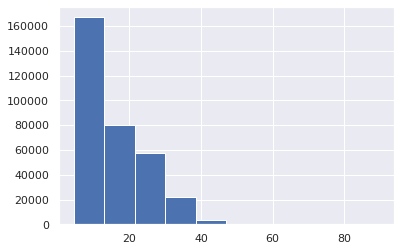

In [36]:
plt.hist(y)
plt.show()